<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/MultipleLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Multiple Linear Regression

### Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download data

In [9]:
%cd ..


/


In [10]:
ls


bin/      dev/   lib32/  opt/         run/   tensorflow-1.15.2/  var/
boot/     etc/   lib64/  proc/        sbin/  tmp/
content/  home/  media/  python-apt/  srv/   tools/
datalab/  lib/   mnt/    root/        sys/   usr/


In [12]:
cd /tmp

/tmp


In [13]:
ls

dap_multiplexer.0beb07d0f820.root.log.INFO.20220419-113232.42
dap_multiplexer.INFO@
debugger_dknddft8p=
initgoogle_syslog_dir.0/
pyright-96-6wMmHfGSTJLl/
pyright-96-qge7Bu02B2h5/
python-languageserver-cancellation/


In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv \
-p /tmp/

--2022-04-19 11:37:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module 2/data/FuelConsumptionCo2.csv’

cf-courses-data.s3. 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-04-19 11:37:43 (1.96 MB/s) - ‘cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module 2/data/FuelConsumptio

In [18]:
df = pd.read_csv('//tmp/cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module 2/data/FuelConsumptionCo2.csv')
df.head(10)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [86]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


### Split data into train and test

In [66]:
msk = np.random.rand(len(df)) < 0.8

In [67]:
train = cdf[msk]
test = cdf[~msk]

In [68]:
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y =  np.asanyarray(test[['CO2EMISSIONS']])


In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
print(regr.coef_)

[[10.82520914  7.97531797  9.35042291]]


In [33]:
print(regr.intercept_)

[65.60415798]


In [ ]:
def multilr(x, intercept,coef):
  y = np.empty((len(x), 1), int)
  temp = 0
  for r in range(len(x)):
    for c in  range(0,3):
      temp = temp+ x[r][c]*coef[0][c]
    y[r][0] = temp+intercept
    temp = 0
  print(y)
  return y

y_hat = multilr(test_x, regr.intercept_ ,regr.coef_)

In [79]:
np.shape(y_hat)

(246, 1)

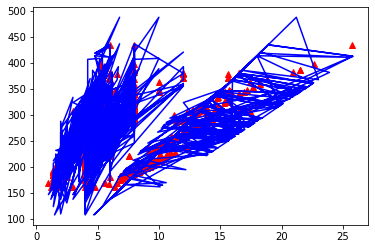

In [91]:
plt.plot(test_x,y_hat, 'r^')
plt.plot(train_x, train_y, color = 'blue')

### Prediction

Ordinary Least Square method helps to identify the best parameters.

In [98]:
yhat = regr.predict(test_x)
print("Residual Sum of squares %f" % np.mean((yhat-test_y)**2))

Residual Sum of squares 484.777637


In [ ]:
print(yhat)

In [99]:
print("Varience score %f " % regr.score(test_x,test_y))

Varience score 0.878887 


#### Training with other column data to check model performance

In [111]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)


Coefficients:  [[11.53879712  7.51463428  5.67109575  3.16709213]]


In [112]:
yhat = regr.predict(test_x)

In [117]:
print(print('Variance score: %.2f' % regr.score(test_x,test_y)))

Variance score: 0.88
None
